In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors=['#97C1A9','#FFFFFF']
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv(r"D:\COURSES\Python\ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Data info

In [19]:
df.shape

(17966, 9)

In [20]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [21]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17966.0,2016.866470,2.050336,1996.0,2016.0,2017.0,2018.0,2060.0
price,17966.0,12279.534844,4741.343657,495.0,8999.0,11291.0,15299.0,54995.0
mileage,17966.0,23362.608761,19472.054349,1.0,9987.0,18242.5,31060.0,177644.0
tax,17966.0,113.329456,62.012456,0.0,30.0,145.0,145.0,580.0
mpg,17966.0,57.906980,10.125696,20.8,52.3,58.9,65.7,201.8
engineSize,17966.0,1.350807,0.432367,0.0,1.0,1.2,1.5,5.0


In [23]:
df.select_dtypes(include='object').nunique()

model           24
transmission     3
fuelType         5
dtype: int64

Segment model attribute into smaller number of unique values

In [53]:
df['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [54]:
def segment_model(model):
    model = model.lower()  # Convert model name to lowercase
    if model.strip() == 'fiesta' or model.strip() == 'focus':
        return 'Compact Cars'
    elif 'kuga' in model or 'ecosport' in model:
        return 'SUVs'
    elif 'tourneo' in model or 's-max' in model or 'b-max' in model:
        return 'Minivans'
    elif 'galaxy' in model or 'mustang' in model or 'grand tourneo connect' in model:
        return 'Luxury Cars'
    elif 'fusion' in model:
        return 'Mid-size Sedans'
    elif 'ranger' in model:
        return 'Compact Pickup Trucks'
    else:
        return 'Other'

df['model'] = df['model'].apply(segment_model)


In [55]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Compact Cars,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Compact Cars,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Compact Cars,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Compact Cars,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Compact Cars,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


<AxesSubplot:>

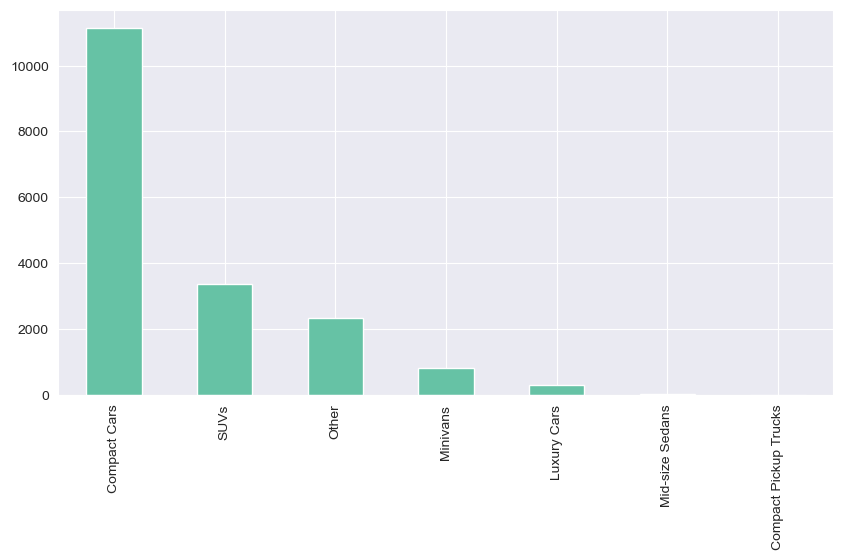

In [56]:
plt.figure(figsize=(10,5))
df['model'].value_counts().plot(kind='bar')

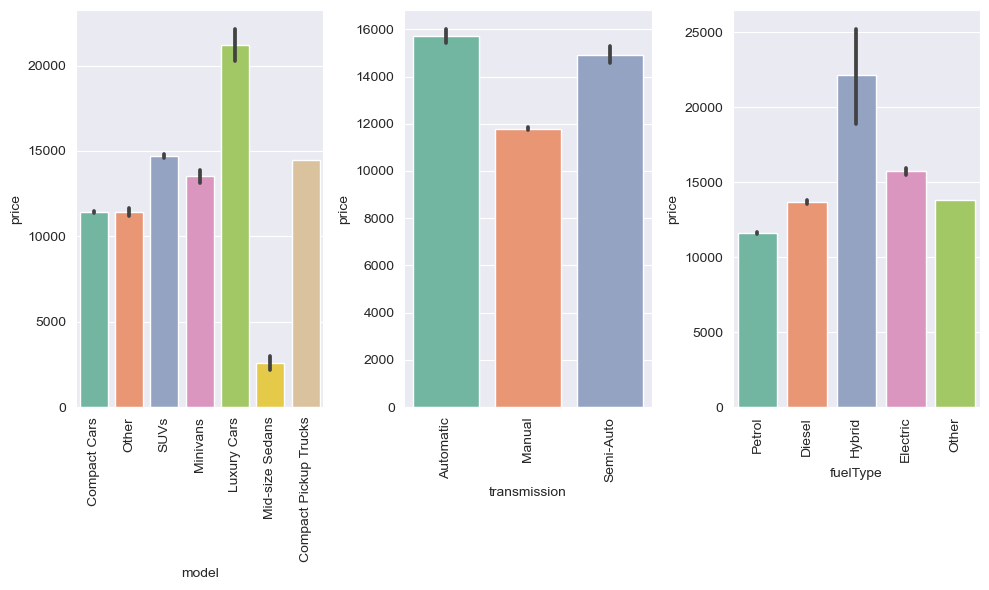

In [57]:
#list of categorical variables to plot
cat_vars=['model','transmission','fuelType']

#create figure with subplots
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(10, 6))
axs=axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var,y='price',data=df,ax=axs[i],estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

#adjust spacing between subplots
fig.tight_layout()

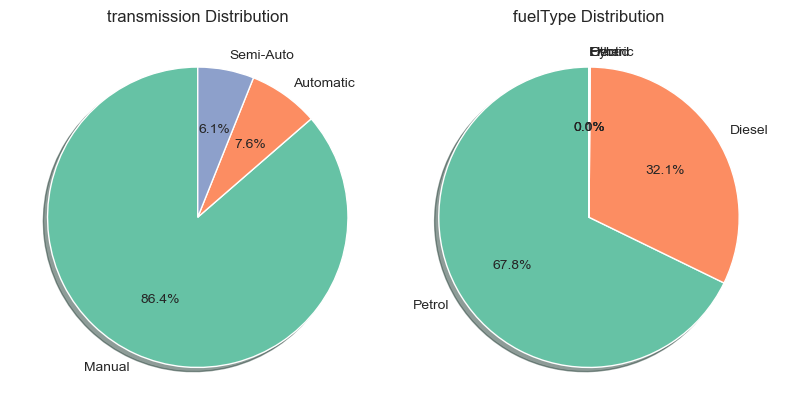

In [58]:
cat_vars=['transmission','fuelType']

#create a figure and axes
fig,axs=plt.subplots(nrows=1, ncols=2,figsize=(8,5))

#create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        #count the number of occurrences for each category
        cat_counts=df[var].value_counts()

        #create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index,autopct='%1.1f%%', shadow=True, startangle=90)

        #set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

#adjust spacing between subplots
fig.tight_layout()

#show the plot
plt.show()

In [59]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Compact Cars,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Compact Cars,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Compact Cars,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Compact Cars,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Compact Cars,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


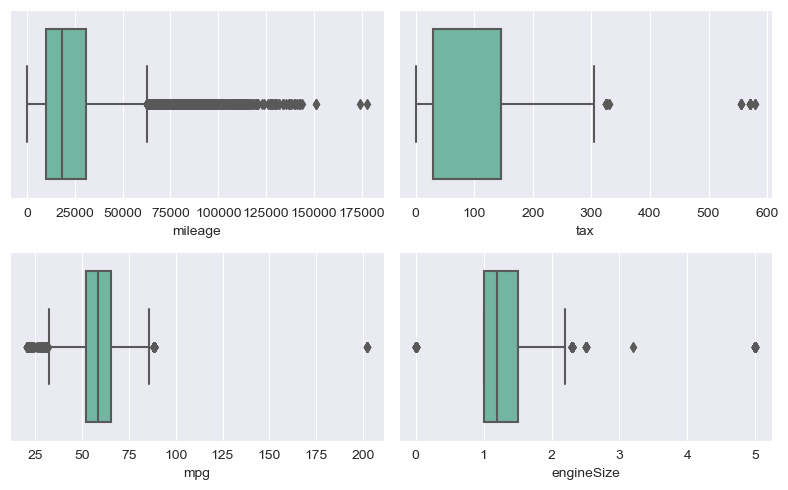

In [60]:
num_vars=['mileage','tax','mpg','engineSize']

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(8,5))
axs=axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])

fig.tight_layout()

plt.show()

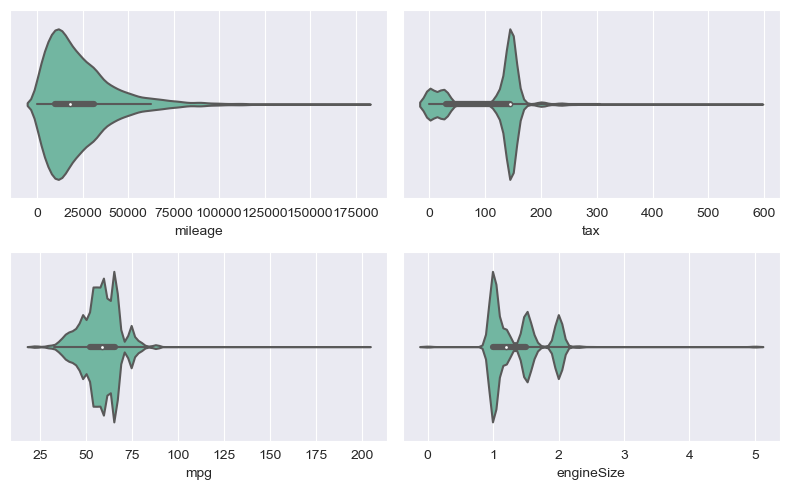

In [62]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
axs=axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()


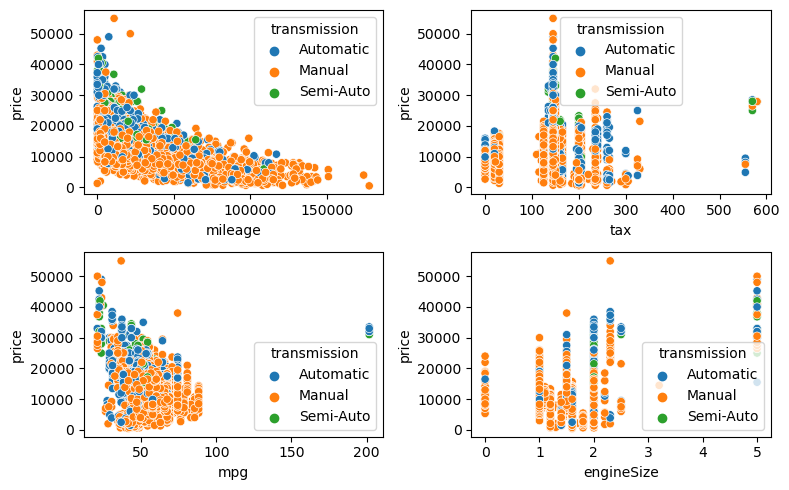

In [47]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
axs=axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var,y='price',hue='transmission', data=df, ax=axs[i])

fig.tight_layout()

plt.show()


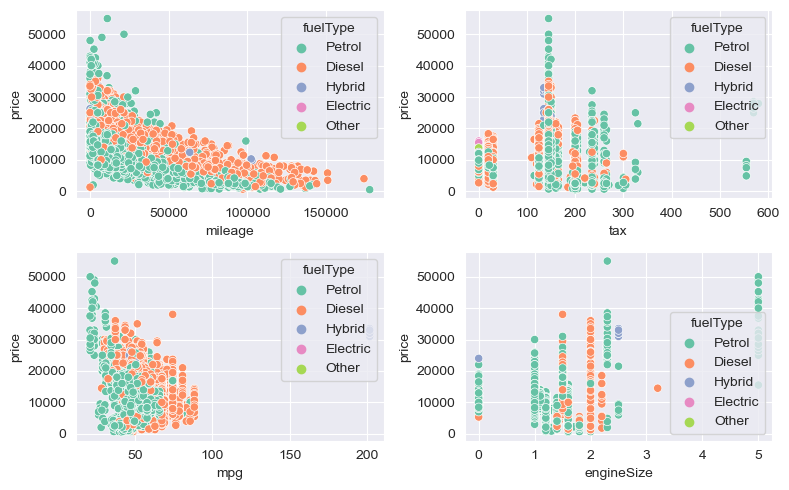

In [63]:
num_vars = ['mileage', 'tax', 'mpg', 'engineSize']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
axs=axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var,y='price',hue='fuelType', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

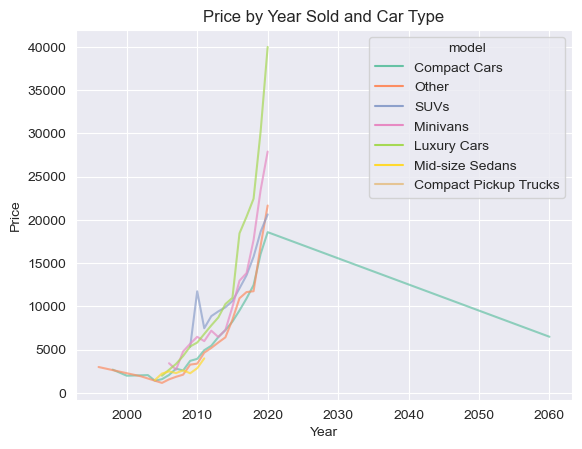

In [64]:
#we have to delete row where year > 2023
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='year',y='price',hue='model',data=df,ci=None,estimator='mean',alpha=0.7)
plt.title("Price by Year Sold and Car Type")
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

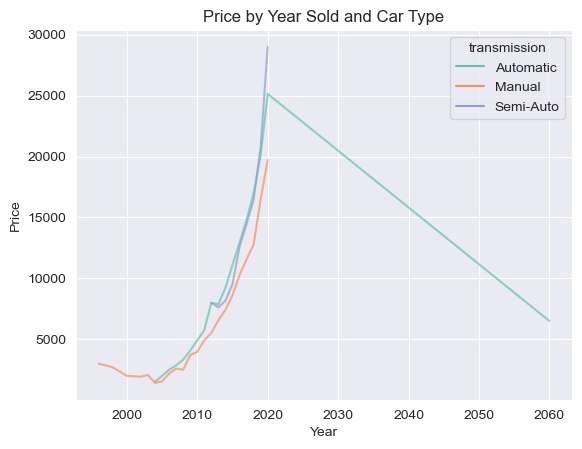

In [65]:
#we have to delete row where year > 2023
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='year',y='price',hue='transmission',data=df,ci=None,estimator='mean',alpha=0.7)
plt.title("Price by Year Sold and Car Type")
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

Data Preprocessing Part 2

In [66]:
df.shape

(17966, 9)

In [70]:
#Delete rows where years >2023
df=df[df['year']<=2023]
df.shape


(17965, 9)

In [71]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Label Encoding Object datatype


In [72]:
#loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include='object').columns:

    #Print the column name and the unique values
    print(f"{col}:{df[col].unique()}")

model:['Compact Cars' 'Other' 'SUVs' 'Minivans' 'Luxury Cars' 'Mid-size Sedans'
 'Compact Pickup Trucks']
transmission:['Automatic' 'Manual' 'Semi-Auto']
fuelType:['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [73]:
from sklearn import preprocessing

#Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    #Initialize a LabelEconder object
    label_encoder=preprocessing.LabelEncoder()

    #Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    #Transform the column using the encoder
    df[col]=label_encoder.transform(df[col])

    #Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

model: [0 5 6 4 2 3 1]
transmission: [0 1 2]
fuelType: [4 0 2 1 3]


Correlation Heatmap

<AxesSubplot:>

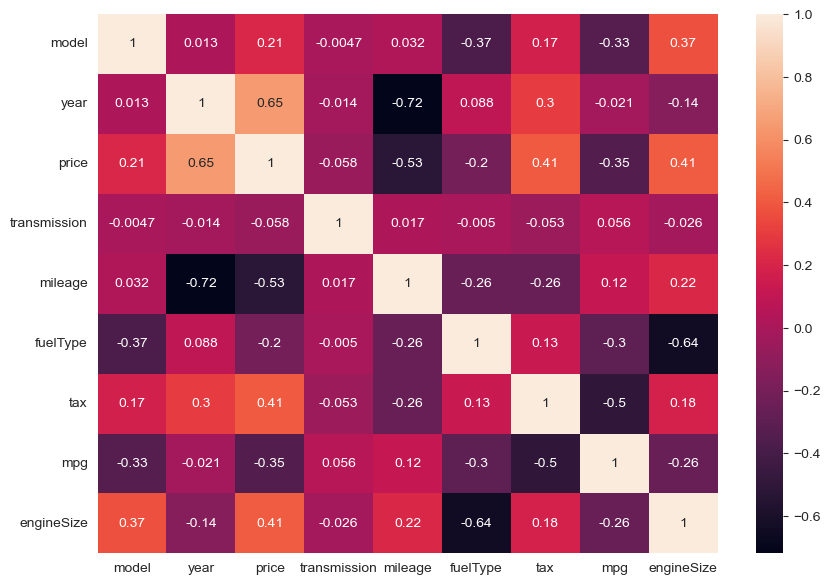

In [75]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

Text(0.5, 1.0, 'Price')

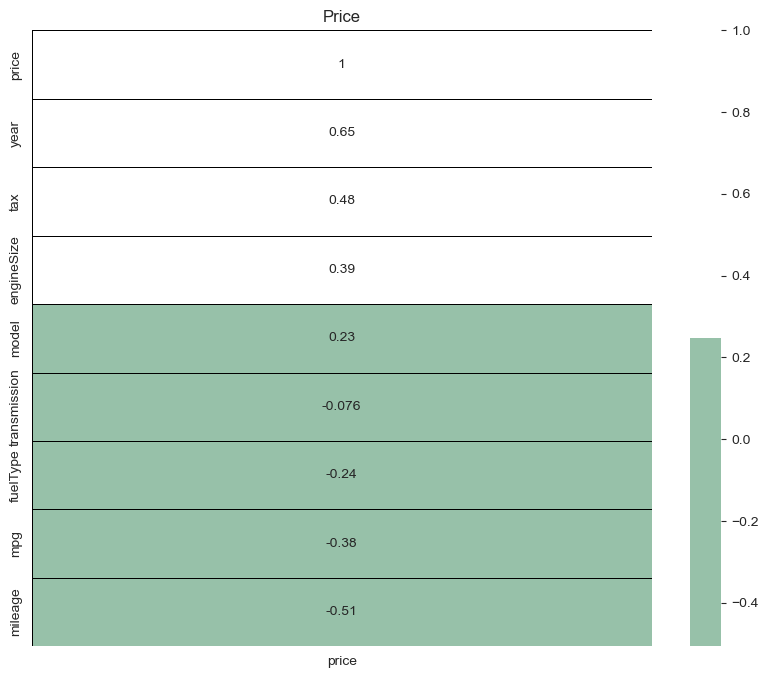

In [103]:
corr=df.corrwith(df['price']).sort_values(ascending=False).to_frame()
corr.columns = ['price']

plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap=colors,linewidths=0.4,linecolor='black')
plt.title("Price")

Removing outliers using z-score

In [77]:
df.shape #number of rows before

(17965, 9)

In [78]:
print(num_vars)

['mileage', 'tax', 'mpg', 'engineSize']


In [79]:
def remove_outliers_zscore(df, threshold=3):
    z_scores = df.apply(lambda x: (x - np.mean(x)) / np.std(x))
    filtered_df = df[(np.abs(z_scores) < threshold).all(axis=1)]
    return filtered_df

In [80]:
# Remove outliers using the Z-score method
filtered_df = remove_outliers_zscore(df)

In [81]:
filtered_df.shape #new shape of our df

(17170, 9)

In [83]:
df.shape[0]-filtered_df.shape[0] #rows removed

795

In [84]:
df=filtered_df

Train Test Split

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df.drop('price', axis='columns'),df['price'],test_size=0.2,random_state=1)

Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

dtree=DecisionTreeRegressor()

param_grid= {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto','sqrt','log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4}


In [89]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=8,max_features='auto',min_samples_leaf=2,min_samples_split=4)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=4)

In [90]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1028.8040837881088
MAPE is 0.08830005090458648
MSE is 2011540.6851359396
R2 score is 0.8840701868790444
RMSE score is 1418.2879415464054


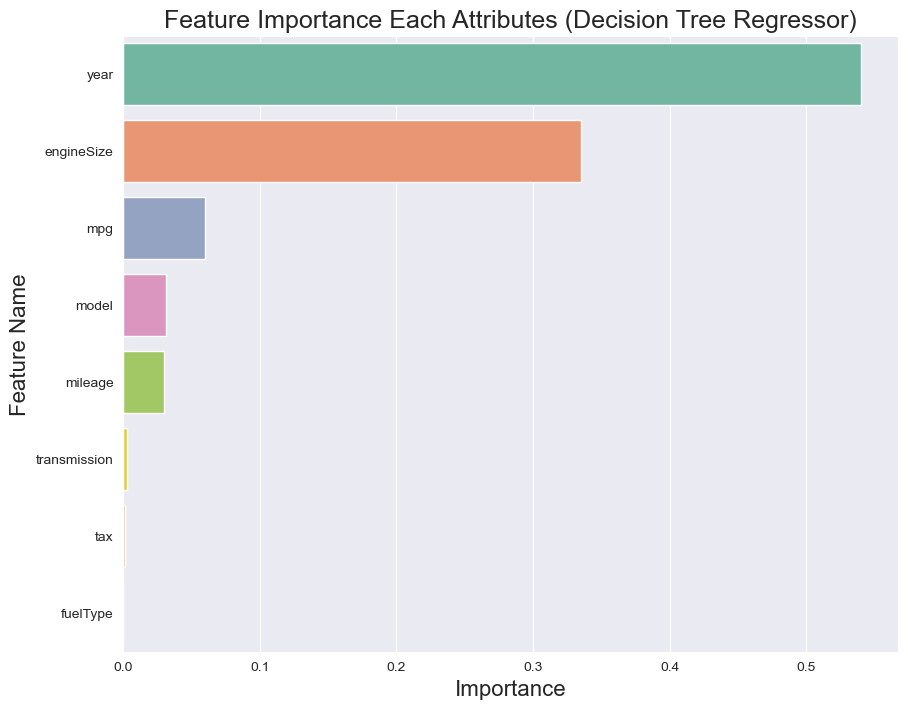

In [91]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

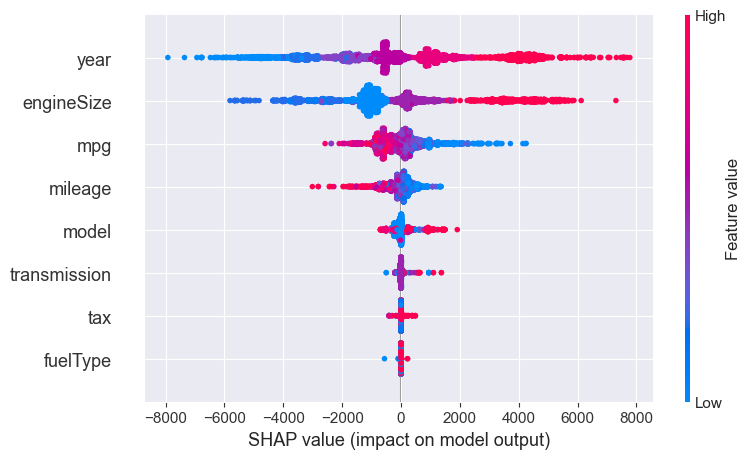

In [92]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

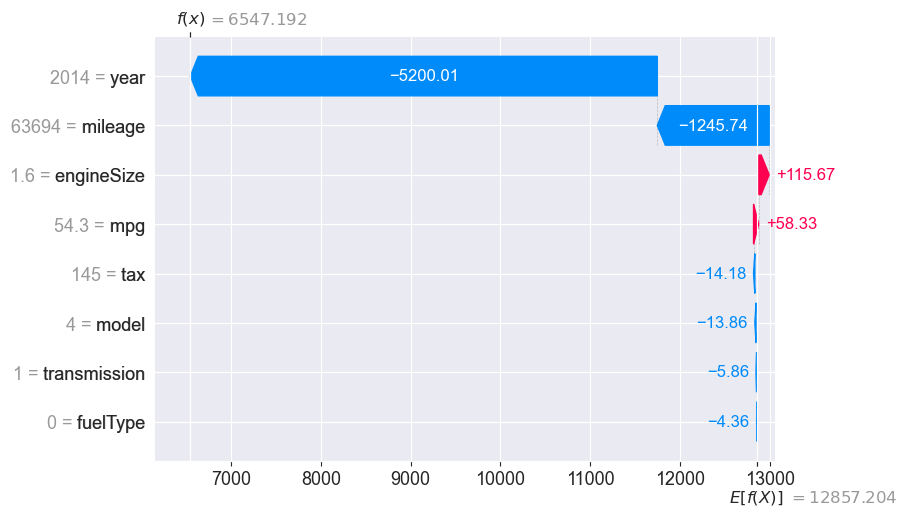

In [93]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor object
rfr = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [95]:
rfr = RandomForestRegressor(max_depth=9,max_features='auto',min_samples_leaf=1,min_samples_split=2)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=9)

In [97]:
y_pred = rfr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 885.6194657751673
MAPE is 0.07477246536231417
MSE is 1494283.806597329
R2 score is 0.9138809153955583
RMSE score is 1222.4090177176088


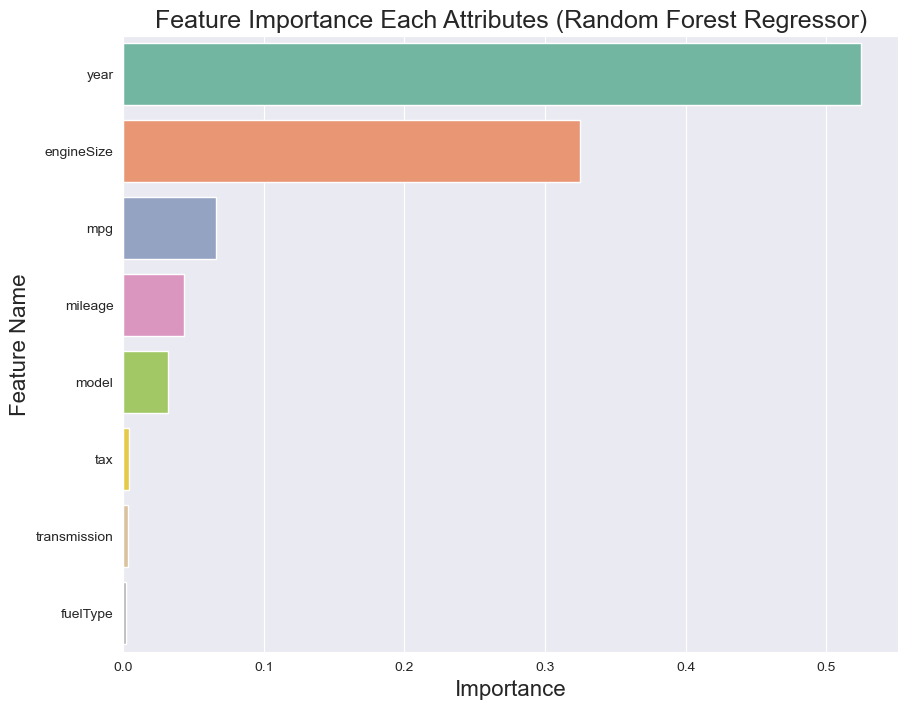

In [98]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

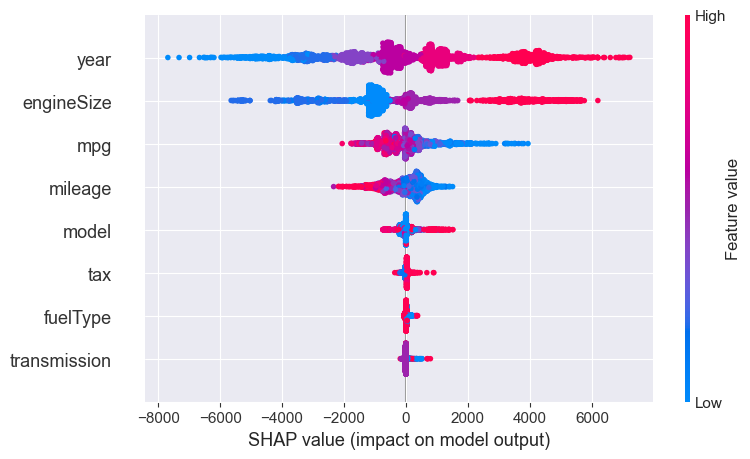

In [102]:
import shap
explainer = shap.TreeExplainer(rfr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

 99%|===================| 3401/3434 [01:31<00:00]        

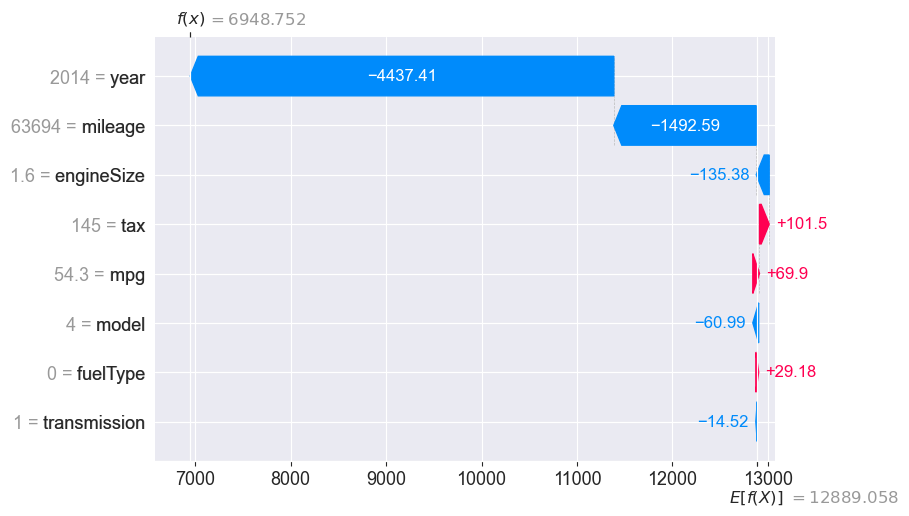

In [101]:
explainer = shap.Explainer(rfr, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])